In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import style
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## 1. Задание

**Решите уравнение**

$\frac{sin(x)}{x} = 0$

ОДЗ: $x \neq 0$

$x = \pi\cdot n$, где $n \neq 0$, и $\in Z$

## 2. Задание

**Даны три прямые y=k1*x+b1, y=k2*x+b2, y=k3*x+b3. Как узнать, пересекаются они в одной точке или нет?**

**ход мысли #1**

Пусть точкой пересечения будет считаться точка $M(x_1; y_1)$

$
\begin{cases}
y_1 = k_1x_1 + b_1\\ 
y_1 = k_2x_1 + b_2\\
y_1 = k_3x_1 + b_3\\
\end{cases}
\sim
\begin{cases}
y_1 = k_1x_1 + b_1\\ 
k_1x_1 + b_1 = k_2x_1 + b_2\\
y_1 = k_3x_1 + b_3\\
\end{cases}
\sim
\begin{cases}
y_1 = k_1x_1 + b_1\\ 
x_1 = \frac{b_2 - b_1}{k_1 - k_2}\\
y_1 = k_3x_1 + b_3\\
\end{cases}
\sim
\begin{cases}
y_1 = k_1x_1 + b_1\\ 
x_1 = \frac{b_2 - b_1}{k_1 - k_2}\\
y_1 = \frac{b_2 - b_1}{k_1 - k_2} \cdot k_3 + b_3\\
\end{cases}
$ 

**Ответ:** если $ y = \frac{b_2 - b_1}{k_1 - k_2} \cdot k_3 + b_3\\ $ то прямые пересекаются в одной точке

**ход мысли #2**

Поочерёдно приравняем пары равенств и так выразим x

$
k_1x + b_1 = k_2x + b_2\\
k_1x - k_2x = b_2 - b_1\\
x(k_1 - k_2) = b_2 - b_1\\
x = \frac{b_2 - b_1}{k_1 - k_2}
$

аналогично для $k_2x + b_2 = k_3x + b_3$ и $k_3x + b_3 = k_1x + b_1$ получим:

$x = \frac{b_2 - b_1}{k_1 - k_2} = \frac{b_3 - b_2}{k_2 - k_3} = \frac{b_1 - b_3}{k_3 - k_1}$

составляем выражение:

$\frac{b_2 - b_1}{k_1 - k_2} = \frac{b_1 - b_3}{k_3 - k_1} \Rightarrow (b_2 - b_1)(k_3 - k_1) = (b_1 - b_3)(k_1 - k_2) \Rightarrow \\ \Rightarrow (b_1 - b_2)(k_1 - k_3) = (b_1 - b_3)(k_1 - k_2) \Rightarrow \frac{(b_1 - b_2)(k_1 - k_3)}{b_1 - b_3} = k_1 - k_2 \Rightarrow \frac{(b_1 - b_2)(k_1 - k_3)}{(b_1 - b_3)(k_1 - k_3)} = \frac{k_1 - k_2}{k_1 - k_3} \Rightarrow \\ \Rightarrow \frac{b_1 - b_2}{b_1 - b_3} = \frac{k_1 - k_2}{k_1 - k_3}$

**Ответ:** если выполняется выражение: $\frac{b_1 - b_2}{b_1 - b_3} = \frac{k_1 - k_2}{k_1 - k_3}$ , то прямые пересекаются в одной точке

## 3. Задание

**На листе тетради «в линейку» (расстояние между линиями равно а) лежит игла (длиной b). Координаты нижней точки иглы (х,у), игла лежит под углом alfa. Пересекает ли игла линию или нет?**

согласно "задаче Бюффона об игле" если соблюдены условия:

1) равновероятных бросаний иглы

2) $a > b$  - расстояние между линиями больше иголки

3) $0 \leq \alpha \leq \pi$ - угол иглы $\alpha$ принимает диапазон от $0$ до $\pi$

4) $0 \leq l \leq a$; $\angle \alpha = b \cdot sin (\alpha)$ - $l$ - это расстояние от нижней точки иглы (x;y) до ближайшей линии, эта величина всегда $\leq$ противолежащему катету угла $\alpha$, но $\geq 0$ 

то игла пересекает линию с вероятностью 

$P = \frac {2b}{\pi a}$

ниже приведена функция, что считает вероятность пересечения линии и строит ориентировочный визуальный график соотношения вероятности от общего количества случаев. Для примера использованы несколько вариантов размеров иглы и расстояний между линиями

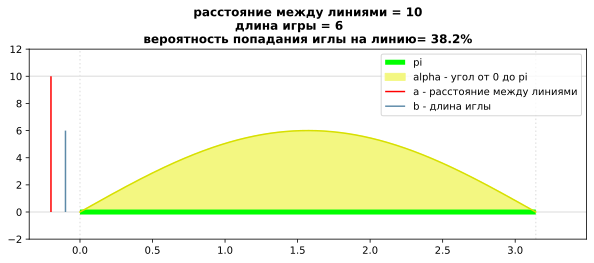

In [2]:
def duff(a, b):
    try:
        assert a >= b
        plt.figure(figsize=(10, 3.5))
        x = np.linspace(0, np.pi, 1001)
        y = (b)*np.sin(x)
        plt.hlines(0, -0.35, x[-1]+0.35, color='#E6E6E6')
        plt.hlines(a, -0.35, x[-1]+0.35, color='#E6E6E6')
        plt.vlines(x[0], -2, a+2, color='#E6E6E6', linestyle=':')
        plt.vlines(x[-1], -2, a+2, color='#E6E6E6', linestyle=':')
        plt.hlines(0, 0, x[-1], color='#00FF00', lw='5', label='pi')
        plt.fill_between(x, y, color='#F3F781', label='alpha - угол от 0 до pi')
        plt.plot(x, y, color = '#D7DF01')
        plt.vlines(-0.2, 0, a, color='red', label='a - расстояние между линиями')
        plt.vlines(-0.1, 0, b, color='#5D8AA8', label='b - длина иглы')
        plt.legend(loc='upper right')
        plt.title(f'расстояние между линиями = {a}\nдлина игры = {b} \
        \nвероятность попадания иглы на линию= {np.round((2*b)/(np.pi*a), 3)*100}%', fontweight='bold')
        plt.xlim(-0.35, x[-1]+0.35)
        plt.ylim(-2, a+2)
    except:
        print('иголка не может быть длиннее расстояния между линиями')

duff(10, 6)

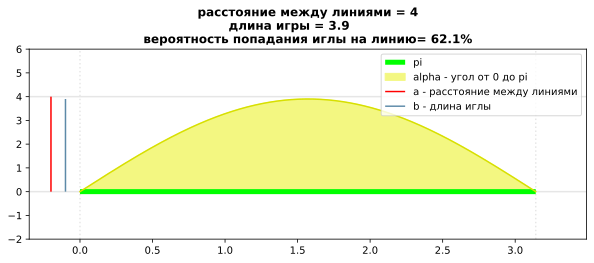

In [3]:
duff(4, 3.9)

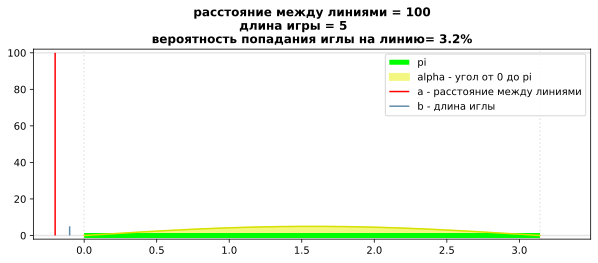

In [4]:
duff(100, 5)

In [5]:
duff(5, 6)

иголка не может быть длиннее расстояния между линиями


## 4. Задание** 

**Решите аналитически и потом численно (в программе) уравнение, зависящее от параметра а: 
sin(а*x)=0
при условии: 0.01<a<0.02, 100<х<500.
Т.е. надо найти решение х как функцию параметра а - построить график x=x(а).
Если численным методом не получается найти все ветви решения x(а), то отыщите хотя бы одну.**

наше условие:

$sin(\alpha x) = 0\,\,\quad$ ОДЗ:
$
\begin{cases}
0.01 \lt \alpha \lt 0.02\\ 
100 \lt x \lt 500\\
\end{cases}
$

выражаем x:

$sin(\alpha x) = 0$

$\alpha x = \pi n$, где $n \in Z$

$x = \frac{\pi n}{\alpha}$


ниже написана функция, что решает уравнение $x = \frac{\pi n}{\alpha}$ по заданным параметрам и находит те значения x, что подходят по условию ОДЗ

при n = 1 =>   100<x<500 и в диапазоне 0.01<a<0.02 = (pi*n)/a = 157
при n = 2 =>   100<x<500 и в диапазоне 0.01<a<0.02 = (pi*n)/a = 314
при n = 3 =>   100<x<500 и в диапазоне 0.01<a<0.02 = (pi*n)/a = 471


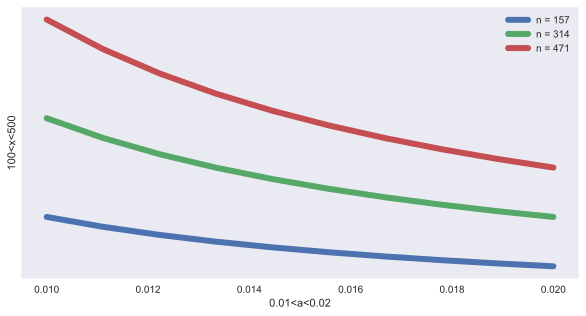

In [6]:
plt.style.use('seaborn')

def sol_eq(min_a, max_a, min_x, max_x):
    a = np.linspace(min_a, max_a, 10)
    x = np.linspace(min_x, max_x, max_x+1)
    result, plot_lin = {}, []
    for n, y in enumerate(a):
        x_ = (np.pi * n)/a
        for i in x_:
            result[n] = np.round(i)
    for v, w in result.items():
        if np.min(x) < w < np.max(x):
            print(f'при n = {v} =>   {min_x}<x<{max_x} и в диапазоне {min_a}<a<{max_a} = (pi*n)/a = {int(w)}')
            plot_lin.append(w)
    plt.figure(figsize=(10, 5))
    for i in plot_lin:
        plt.plot(a, np.pi*i/a, label=f'n = {int(i)}', lw=6)
    plt.grid()
    plt.xlabel(f'{min_a}<a<{max_a}')
    plt.ylabel(f'{min_x}<x<{max_x}')
    plt.yticks([])
    plt.legend();
    
    
min_alpha = 0.01
max_alpha = 0.02
min_x = 100
max_x = 500
sol_eq(min_alpha, max_alpha, min_x, max_x)

в качестве эксперимента можно поспробовать увеличить диапазон x - тогда мы получим больше подходящих нам решений

при n = 1 =>   100<x<800 и в диапазоне 0.01<a<0.02 = (pi*n)/a = 157
при n = 2 =>   100<x<800 и в диапазоне 0.01<a<0.02 = (pi*n)/a = 314
при n = 3 =>   100<x<800 и в диапазоне 0.01<a<0.02 = (pi*n)/a = 471
при n = 4 =>   100<x<800 и в диапазоне 0.01<a<0.02 = (pi*n)/a = 628
при n = 5 =>   100<x<800 и в диапазоне 0.01<a<0.02 = (pi*n)/a = 785


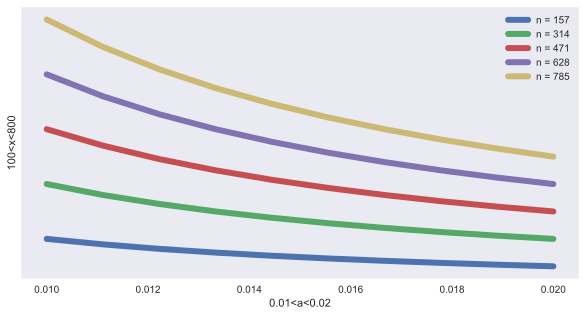

In [7]:
max_x = 800
sol_eq(min_alpha, max_alpha, min_x, max_x)

## 17.6.2

**Найти угол $\alpha$ между прямыми $4y - 3x + 12 = 0$ и $7y + x - 14 = 0$**

$tg(\alpha) = \frac{a_2 b_1 - a_1 b_2}{a_1a_2 + b_1 b_2} = \frac{1 \cdot 4 - (-3) \cdot 7}{(-3) \cdot 1 + 4 \cdot 7} = \frac{25}{25} = 1$

$\Rightarrow \alpha = \frac{\pi}{4} = 1 \, или \, 45^o$

## 17.6.4

**Найти угол $\alpha$ между прямыми $x = \sqrt2$ и $x = -\sqrt3$**

прямые вида $x - \sqrt2 = 0$ и $x + \sqrt3 = 0$ не имеют коэффициента k $\Rightarrow$ они не пересекаются, так как параллельны друг другу, угол между ними = $0^o$

## Выяснить тип кривых второго порядка, порождённых следующими уравнениями

## 17.6.5

$y^2 - 2x - 2y - 5 = 0$

$y^2 - 2x - 2y - 5 + 1 - 1 = 0$

$(y^2 - 2y + 1) - (2x + 6) = 0$

$(y - 1)^2 - 2(x + 3) = 0$

$(y - 1)^2 = 2(x + 3)$

Уравнение вида $y^2 = 2 \cdot p \cdot x \Rightarrow$ **парабола**

## 17.6.6

$3x^2 + 5y^2 + 12x - 30y + 42 = 0$

$3x^2 + 12x + 5y^2 - 30y + 42 = 0$

$3x^2 + 12x + 5y^2 - 30y + 12 - 15 + 45 = 0$

$(3x^2 + 12x + 12) + (5y^2 - 30y + 45)  = 15$

$3(x + 2)^2 + 5(y - 3)^2 = 15$

$\frac{(x + 2)^2}{5} + \frac{(y - 3)^2}{3} = 1$

Уравнение вида $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 \Rightarrow$ **эллипс**

## 17.6.7

$2x^2 - y^2 + 6y - 7 = 0$

$2x^2 - y^2 + 6y -7 + 9 - 9 = 0$

$2x^2 - (y^2 - 6y + 9) - 7 + 9 = 0$

$2x^2 - (y^2 - 6y + 9) + 2 = 0$

$2x^2 - (y - 3)^2 = -2$

$-\frac{x^2}{1} + \frac{(y - 3)^2}{2} = 1$

$\frac{(y - 3)^2}{2} - \frac{x^2}{1} = 1$

Уравнение вида $\frac{x^2}{a^2} - \frac{y^2}{b^2} = 1 \Rightarrow$ **гипербола**

## 17.6.8

$2x^2 - 3y^2 - 28x - 42y - 55 = 0$

$(2x^2 - 28x) - (3y^2 - 42y) - 55 = 0$

$(2x^2 - 28x) - (3y^2 - 42y) + 98 - 147 - 6 = 0$

$(2x^2 - 28x) - (3y^2 - 42y) + 49 \cdot 2 - 49 \cdot 3 - 6 = 0$

$2(x - 7)^2 - 3(y + 7)^2 = 6$

$\frac{(x - 7)^2}{3} - \frac{(y + 7)^2}{2} = 1$

Уравнение вида $\frac{x^2}{a^2} - \frac{y^2}{b^2} = 1 \Rightarrow$ **опять гипербола**